# <font color = 'orange'> Assignment-22 Solutions

## Note : Output for the questions may not be visible in the git jupyter notebook so screenshots of the questions will be attached below the answer.

---

### Q1. How can you create a Bokeh plot using Python code?

In [1]:
from bokeh.plotting import figure , output_file , show 
p = figure(title='My bokeh plot')
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p.circle(x,y)
output_file('plot1.html')
show(p)

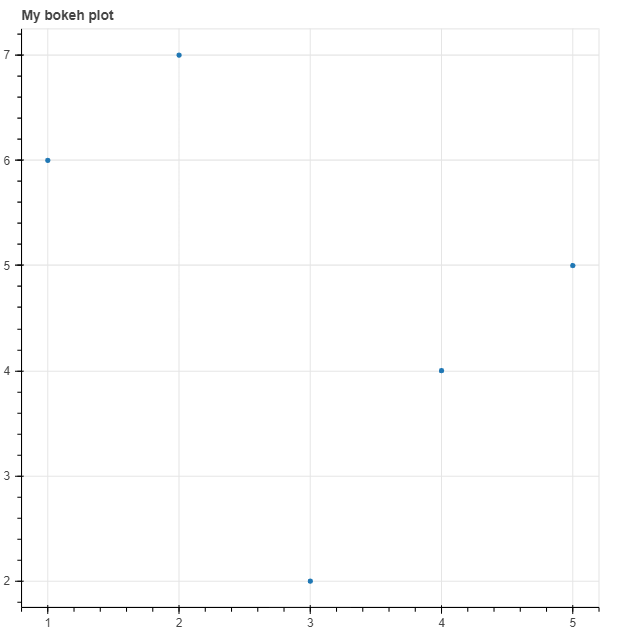

---

### Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

#### In Bokeh, glyphs are visual shapes or markers that you can add to a plot to represent your data.

In [2]:
from bokeh.plotting import figure, show, output_file
p = figure(title="Glyph Example")
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

p.circle(x, y, size=10, color="blue", alpha=0.5, legend_label="Circles")
p.line(x, y, line_width=2, line_color="green", legend_label="Line")
p.rect(x, y, width=0.2, height=0.4, color="red", alpha=0.6, legend_label="Rectangles")

p.legend.title = "Glyph Types"
p.legend.label_text_font_size = "12pt"

output_file("glyph_example.html")
show(p)

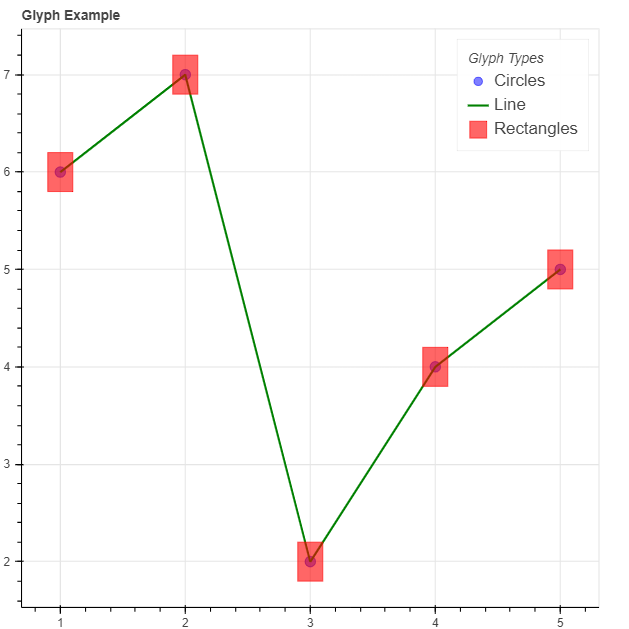

---

### Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

In [3]:
from bokeh.plotting import figure, show, output_file
p = figure(title="Customized Bokeh Plot", x_axis_label="X-Axis Label", y_axis_label="Y-Axis Label")
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# Add a line glyph
p.line(x, y, line_width=2, line_color="green", legend_label="Line")

# Customize the appearance of axes
p.xaxis.axis_label_text_font_style = "italic"
p.yaxis.axis_label_text_font_size = "14pt"
p.xaxis.major_label_text_color = "blue"
p.yaxis.major_label_text_color = "red"

# Customize the title
p.title.text = "Customized Bokeh Plot"
p.title.text_color = "purple"
p.title.text_font_size = "16pt"

# Customize the legend
p.legend.title = "Legend"
p.legend.label_text_font_style = "bold"
p.legend.label_text_color = "orange"
p.legend.location = "top_left"

output_file("customized_bokeh_plot.html")
show(p)

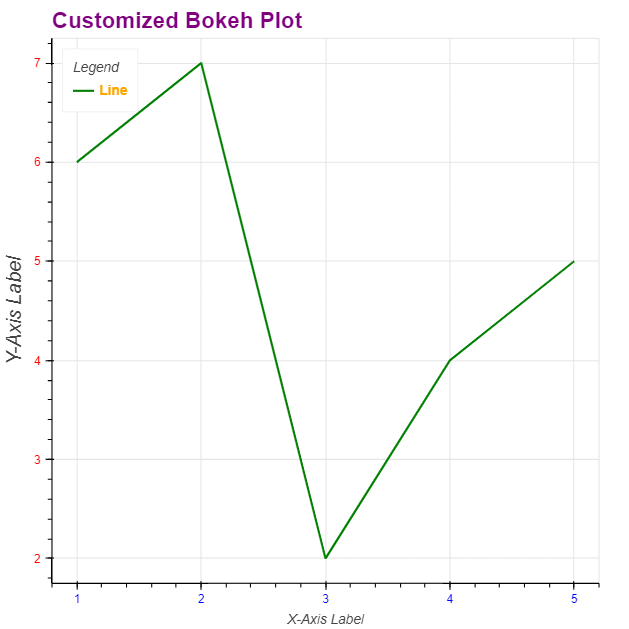

---

### Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?

#### A Bokeh server is a powerful feature of the Bokeh library that allows you to create interactive web applications and dashboards with real-time updates.
#### The below is the example code to create the bokeh interactive plots that updated in real time. When the scrool bar is moved then the color of the dot will change.

In [5]:
from bokeh.plotting import figure, show
from bokeh.models import Slider, CustomJS, ColumnDataSource
from bokeh.layouts import column
from bokeh.io import curdoc

# Create a data source
source = ColumnDataSource(data={'x': [1, 2, 3, 6], 'y': [4, 6, 1, 3], 'color': ['blue', 'green', 'red', 'yellow']})

# Create a figure
p = figure(width=400, height=400, title="Interactive Bokeh Plot")
circle = p.circle('x', 'y', size=20, color='color', source=source)

# Create a slider widget
slider = Slider(start=0, end=3, value=0, step=1, title="Choose Color")

# Define JavaScript callback to update circle color
callback = CustomJS(args=dict(source=source, slider=slider), code="""
    const data = source.data;
    const color = data.color;
    const selected_color_index = slider.value;

    for (let i = 0; i < color.length; i++) {
        // Define an array of available colors
        const availableColors = ['blue', 'green', 'red', 'yellow'];
        
        // Set the color for each data point based on the slider value
        color[i] = availableColors[selected_color_index];
    }

    source.change.emit();
""")

# Attach the callback to the slider widget
slider.js_on_change('value', callback)

# Create a layout using Column
layout = column(p, slider)

# Add the layout to the current document
curdoc().add_root(layout)


# To run the code -> bokeh serve Assignment-22_Q4.py
# Open in browser -> http://localhost:5006/Assignment-22_Q4

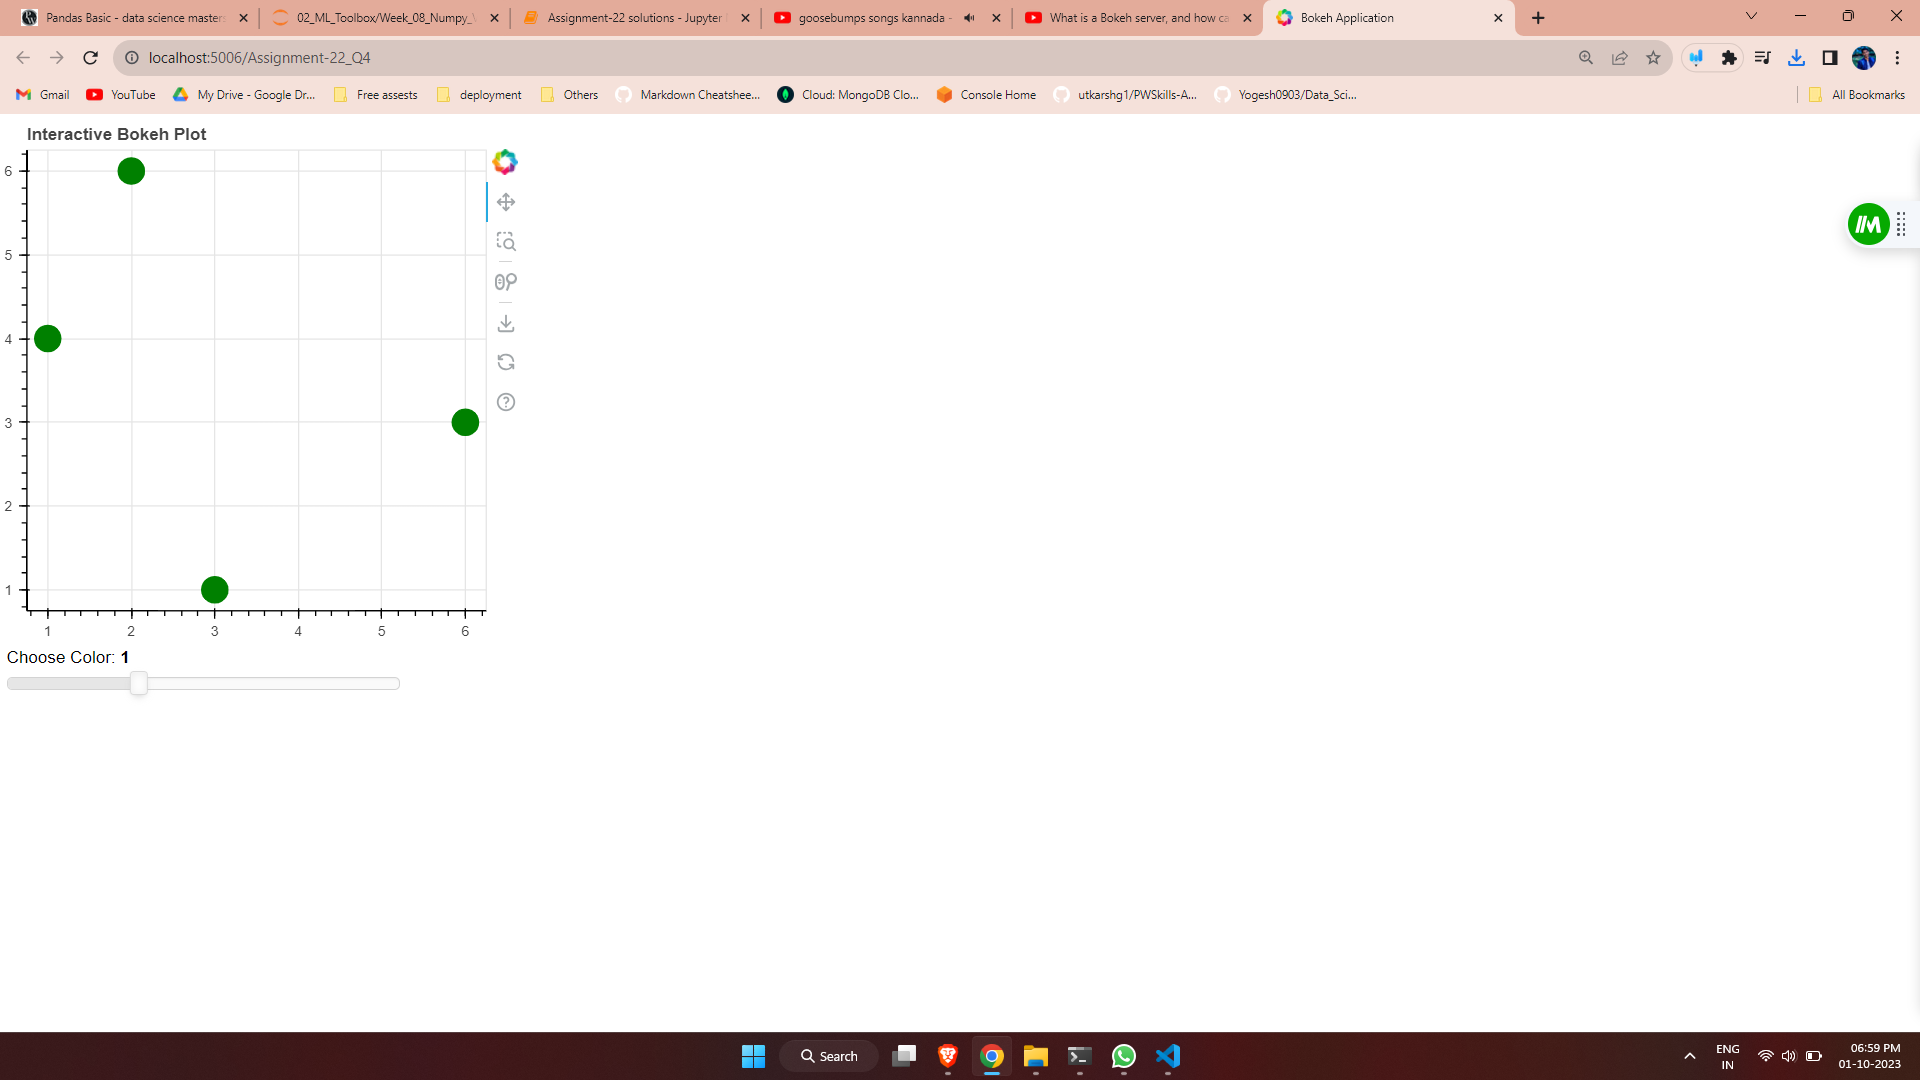

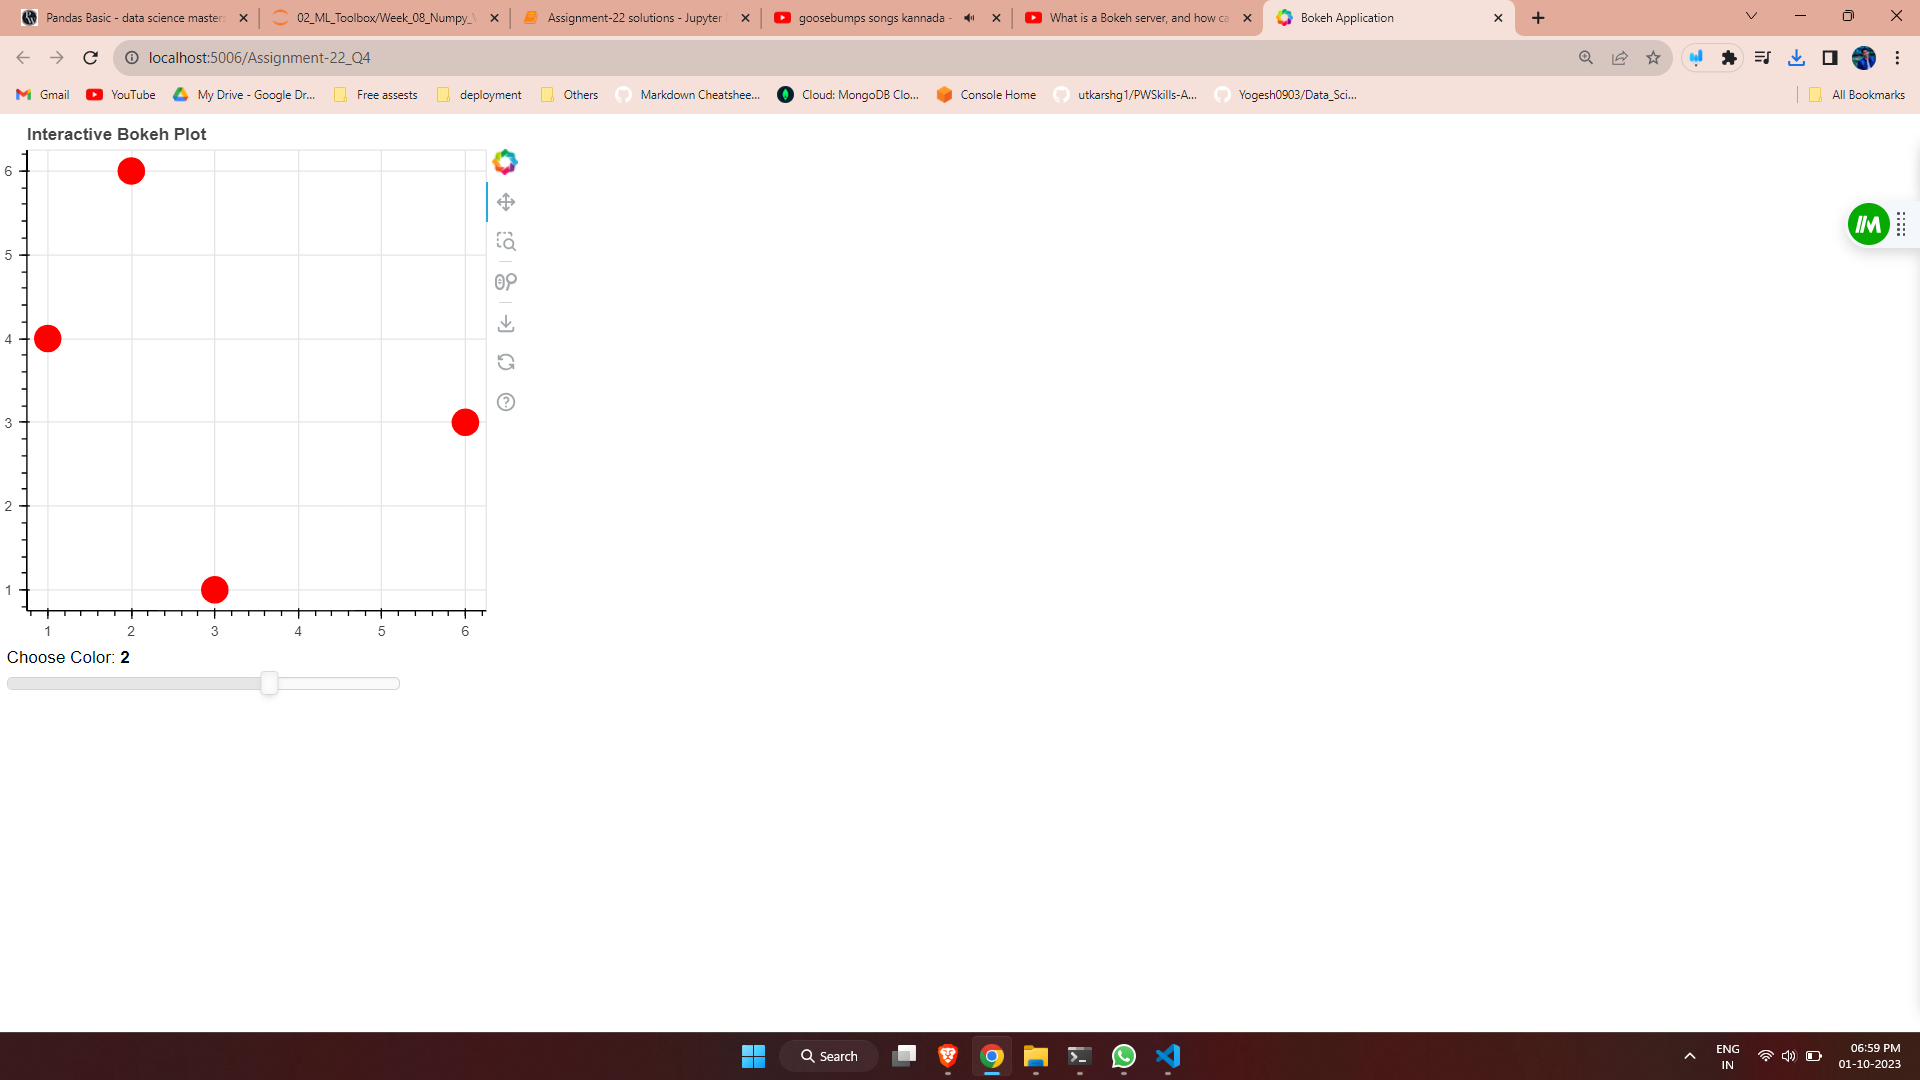

---

### Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

In [7]:
import numpy as np
from bokeh.plotting import figure, show , curdoc
from bokeh.models import Div, Spinner
from bokeh.layouts import layout

x = np.random.random(50)
y = np.random.random(50)

p = figure(title="This is a scatter plot")
points = p.circle(x, y)

div = Div(text="<p>Select Size</p>")
spinner = Spinner(title="Circle Size", low=0, high=20, step=1, value=points.glyph.size, width=200)
spinner.js_link('value',points.glyph,'size')
my_layout = layout([[div,spinner],[p]])

show(my_layout)

#### In the below output of the above code will change the size of the points when the size of given as input.

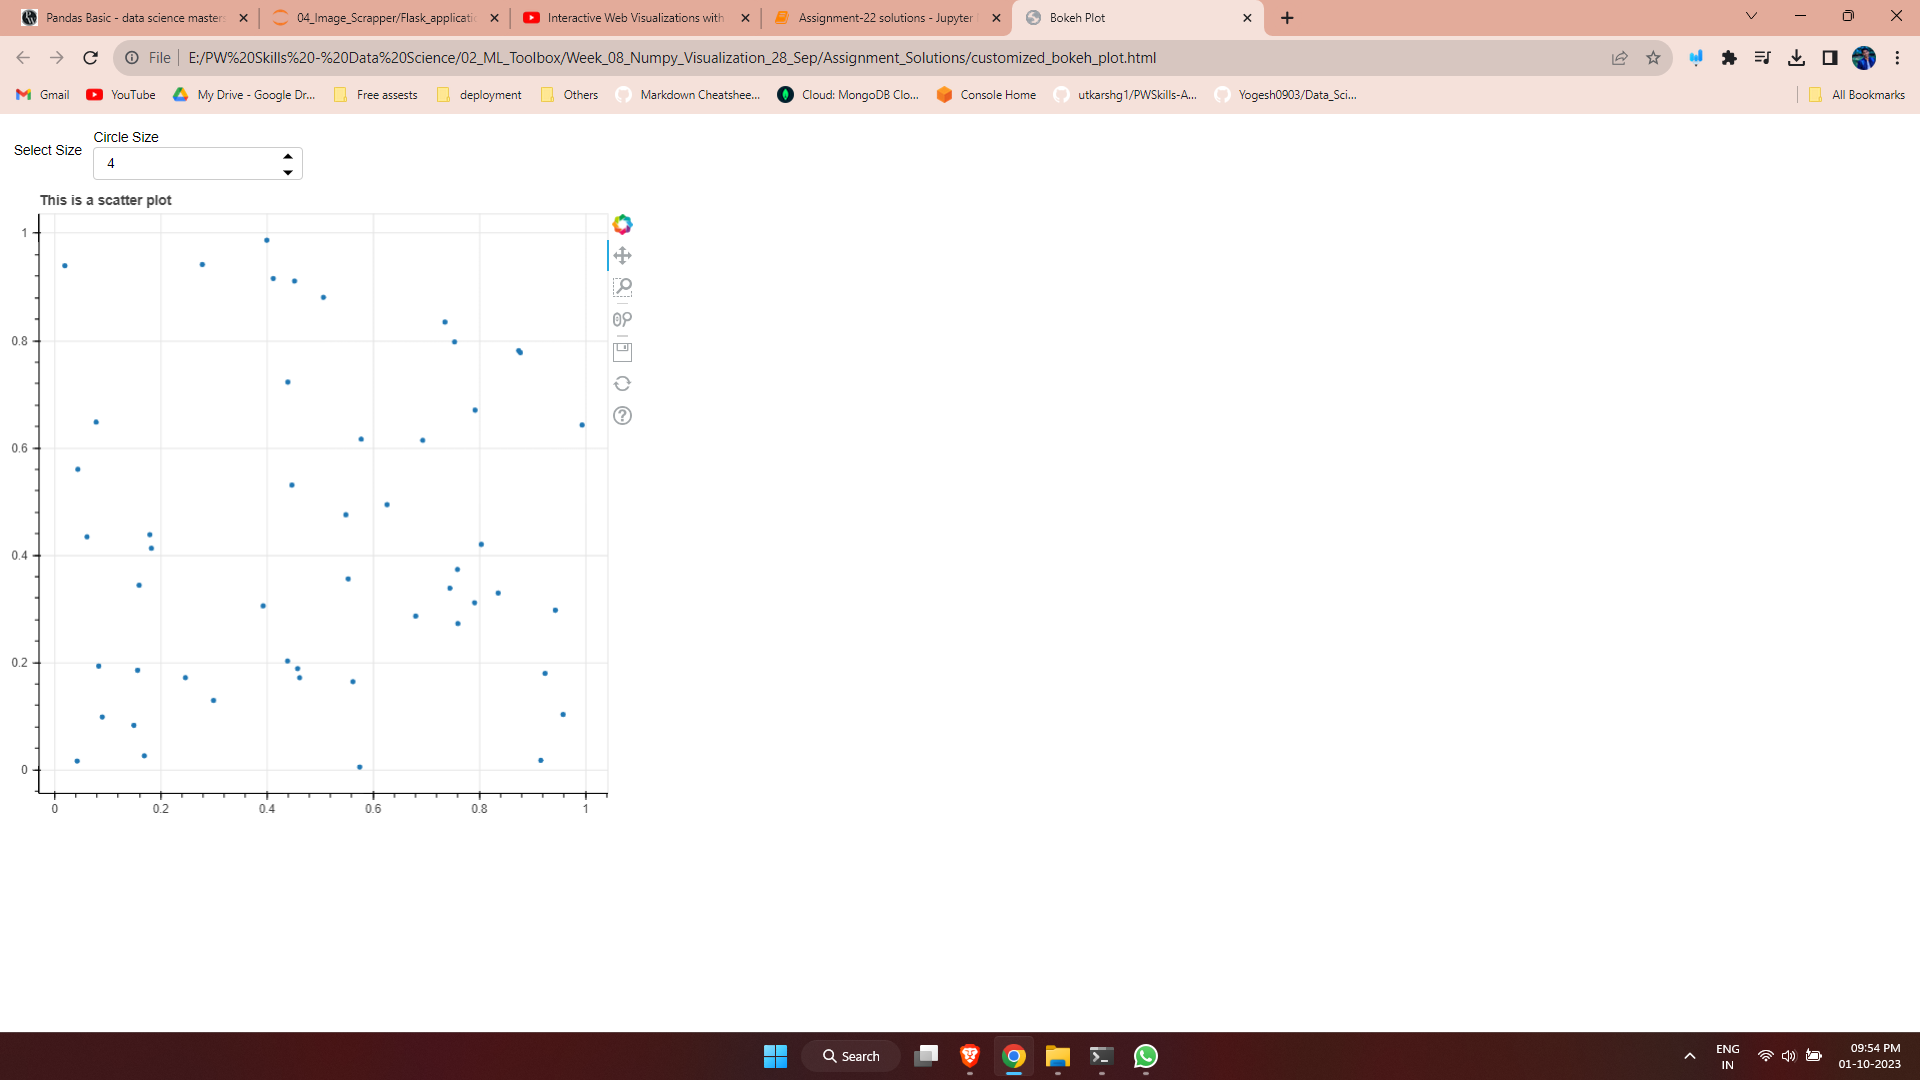

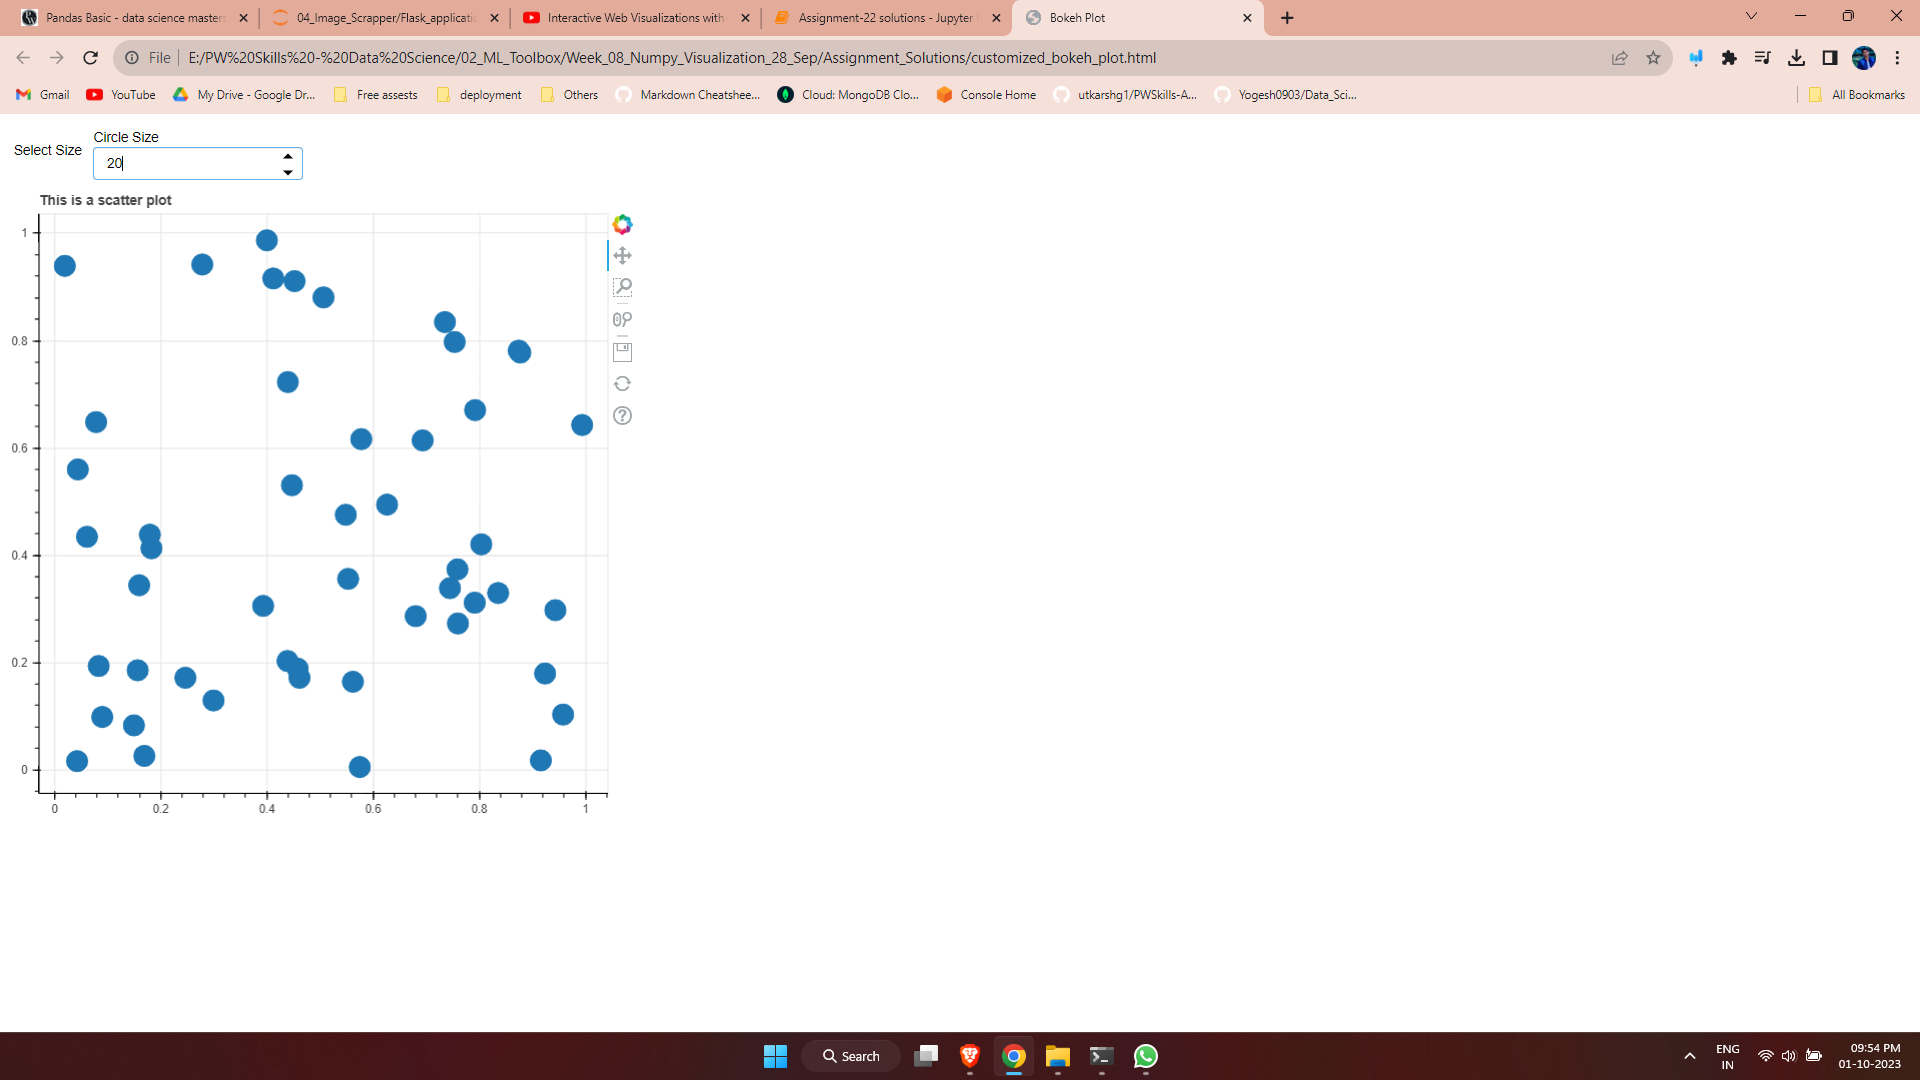

---